<a href="https://colab.research.google.com/github/rashadkp/Image_Processing/blob/master/fft_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the name of the image file: cameraman.jpg


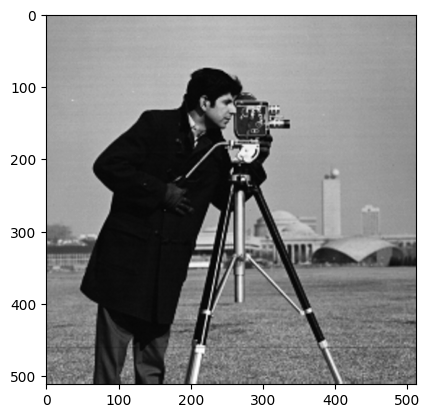

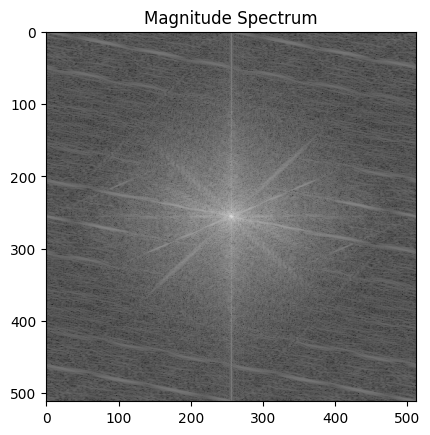

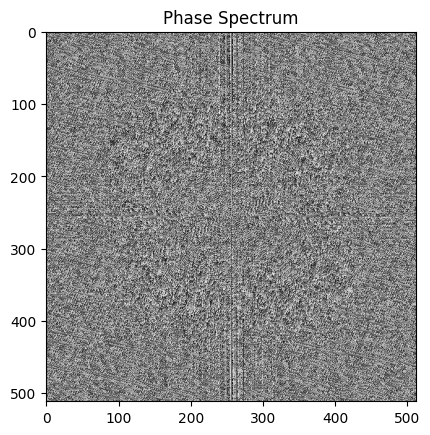

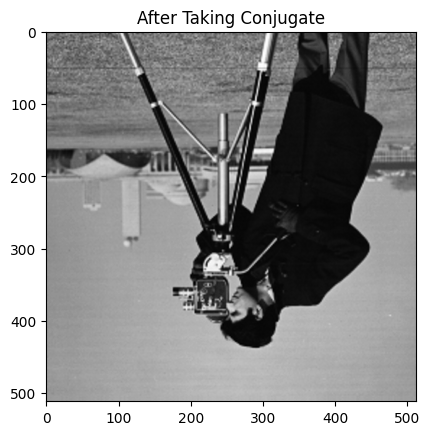

In [ ]:


import numpy as np
import math
import cmath
import cv2
import matplotlib.pyplot as plt

def fft(image):
    N = len(image)
    image = np.array(image, dtype=complex)
    if N == 1:
        return image
    even = fft(image[0::2])
    odd = fft(image[1::2])
    F = np.zeros(N, dtype=complex)
    for i in range(N // 2):
        complex_exponential = cmath.exp(-2j * math.pi * i / N)
        odd[i] = odd[i] * complex_exponential
        F[i] = even[i] + odd[i]
        F[i + N // 2] = even[i] - odd[i]
    return F

def ifft(image):
    N = len(image)
    image = np.array(image, dtype=complex)
    if N <= 1:
        return image
    even = ifft(image[::2])
    odd = ifft(image[1::2])
    F = np.zeros(N, dtype=complex)
    for i in range(N // 2):
        complex_exponential = cmath.exp(2j * math.pi * i / N)
        odd[i] = odd[i] * complex_exponential
        F[i] = even[i] + odd[i]
        F[i + N // 2] = even[i] - odd[i]
    return F

input_image_path = input("Enter the name of the image file: ")
original_image = cv2.imread(input_image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
gray_image = np.array(gray_image)

plt.imshow(gray_image, cmap='gray')
plt.show()

image_shape = gray_image.shape
complex_shape = np.array(image_shape[0], dtype=complex)

# Perform the bit-reversal operation
for i in range(0, image_shape[0]):
    for j in range(0, image_shape[1]):
        gray_image[i, j] = ((-1) ** (i + j)) * gray_image[i, j]

fft_image = np.zeros(image_shape, dtype=complex)
ifft_image = np.zeros(image_shape, dtype=complex)

# Perform 2D FFT
for i in range(0, image_shape[0]):
    complex_shape = fft(gray_image[i, :])
    fft_image[i, :] = complex_shape

for i in range(0, image_shape[1]):
    complex_shape = fft(fft_image[:, i])
    fft_image[:, i] = complex_shape

# Calculate magnitude and phase spectra
magnitude_spectrum = np.log(np.abs(fft_image))
phase_spectrum = np.angle(fft_image)

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()

plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum')
plt.show()

# Compute the inverse FFT
ifft_image = np.conjugate(fft_image)
for i in range(0, image_shape[0]):
    complex_shape = ifft(ifft_image[i, :])
    ifft_image[i, :] = complex_shape

for i in range(0, image_shape[1]):
    complex_shape = ifft(ifft_image[:, i])
    ifft_image[:, i] = complex_shape

ifft_image /= (image_shape[0] * image_shape[1])
real_part = np.round(np.real(ifft_image)) #added round , now we are getting noise free dip image

for i in range(0, image_shape[0]):
    for j in range(0, image_shape[1]):
        real_part[i, j] = ((-1) ** (i + j)) * real_part[i, j]

final_image = real_part + 1j * (np.imag(ifft_image))
final_magnitude = np.abs(final_image)
final_image = np.array(real_part, dtype='uint8')

plt.imshow(final_image, cmap='gray')
plt.title('After Taking Conjugate')
plt.show()


In [ ]:

def fft(image):
    N = len(image)
    image = np.array(image, dtype=complex)
    if N == 1:
        return image
    even = fft(image[0::2])
    odd = fft(image[1::2])
    F = np.zeros(N, dtype=complex)
    for i in range(N // 2):
        complex_exponential = cmath.exp(-2j * math.pi * i / N)
        odd[i] = odd[i] * complex_exponential
        F[i] = even[i] + odd[i]
        F[i + N // 2] = even[i] - odd[i]
    return F

In [ ]:
x=np.arange(8)

In [ ]:
g=fft(x)
y=ifft(g)
print(x)
print(g)
print(y)


[0 1 2 3 4 5 6 7]
[28.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]
[1.77635684e-15+0.00000000e+00j 8.00000000e+00+1.82212635e-15j
 1.60000000e+01-7.96639400e-16j 2.40000000e+01+1.73058733e-15j
 3.20000000e+01+0.00000000e+00j 4.00000000e+01-1.73058733e-15j
 4.80000000e+01+7.96639400e-16j 5.60000000e+01-1.82212635e-15j]
